# Implementar DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <strong>es</strong> un algoritmo de clusterización, que busca generar clusters de datos basándose en su densidad. Este algoritmo es uno de los más utilizados para la creación de clusters, ya que es capaz de detectar tanto clusters de forma compacta como clusters con formas irregulares. Esto se logra analizando la densidad de los datos, y asignando a cada punto a un cluster según la cantidad de puntos cercanos que posea. Permite detectar clusters de forma no supervisada, sin tener que definir un número previo de clusters.

<img src='https://miro.medium.com/max/527/1*32GfYlMmGRFzbq5FPi4tYQ.png'>

### Importar librerías y preparar datos de prueba

In [1]:
# Importar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from itertools import product

# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generar datos sintéticos
x, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

# Crear Dataframe
df_blobs = pd.DataFrame(
    {
        'x1': x[:, 0],
        'x2': x[:, 1]
    }
)

# Crear Dataframe con los centroides
df_centers = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1],
    }
)

In [3]:
# Generar datos sintéticos con make_moons
x_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

# Crear dataframe
df_moons = pd.DataFrame(
    {
        'x1': x_m[:, 0],
        'x2': x_m[:, 1]
    }
    )

### Visualizar datos

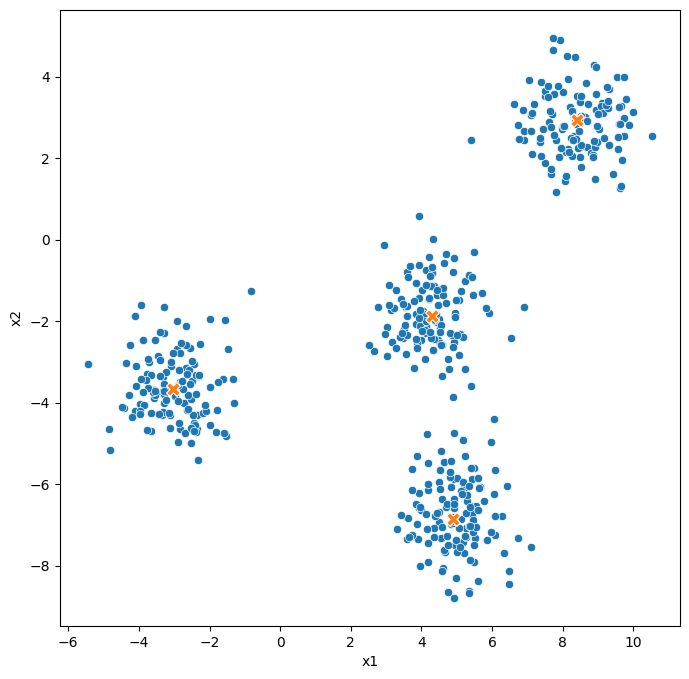

In [20]:
# df_blobs
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.plot()
plt.show()

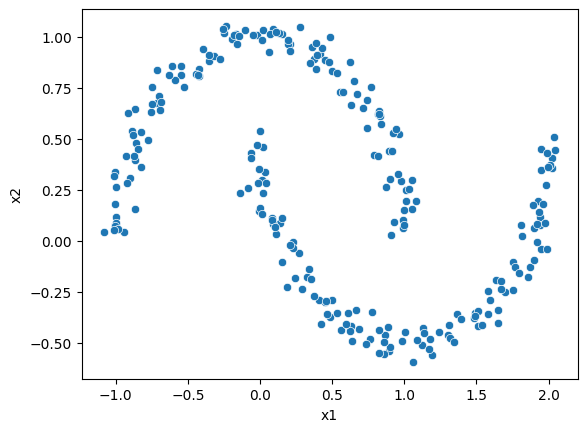

In [4]:
# df_moons
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

### Implementar DBSCAN

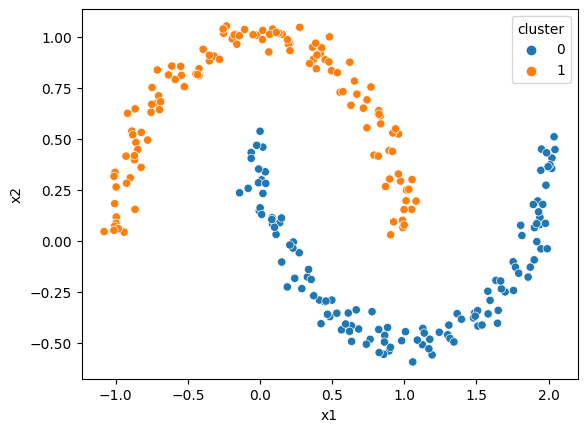

In [5]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(x_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

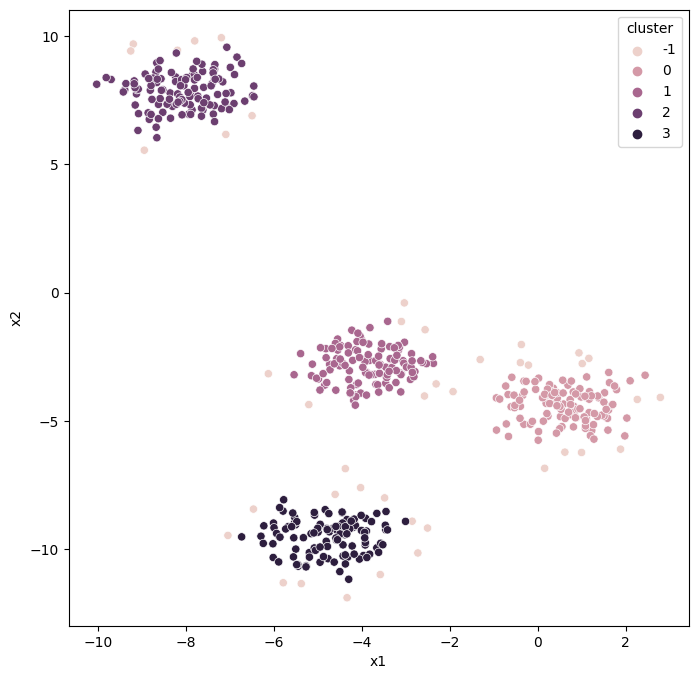

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(x)
df_blobs['cluster'] = y_predict 

fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

### Encontrar híper-parámetros

Los híper-parámetros en DBSCAN son parámetros utilizados para controlar el comportamiento del algoritmo DBSCAN. Estos parámetros incluyen el radio de vecindad (eps) y el número mínimo de puntos requeridos para formar un grupo (min_samples). El radio de vecindad es el radio de la circunferencia centrada en cada punto, dentro del cual se considera que los puntos son vecinos. El número mínimo de puntos indica el número mínimo de puntos que deben estar contenidos dentro del radio de vecindad para que se considere un grupo. El ajuste adecuado de estos parámetros es importante para obtener resultados significativos al usar el algoritmo DBSCAN.

In [7]:
'''
El código encuentra los vecinos más cercanos de cada punto en el dataset, utilizando el algoritmo NearestNeighbors. Esto devuelve las distancias y los índices de los vecinos más cercanos, que serán útiles para calcular el epsilon (eps).
'''
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

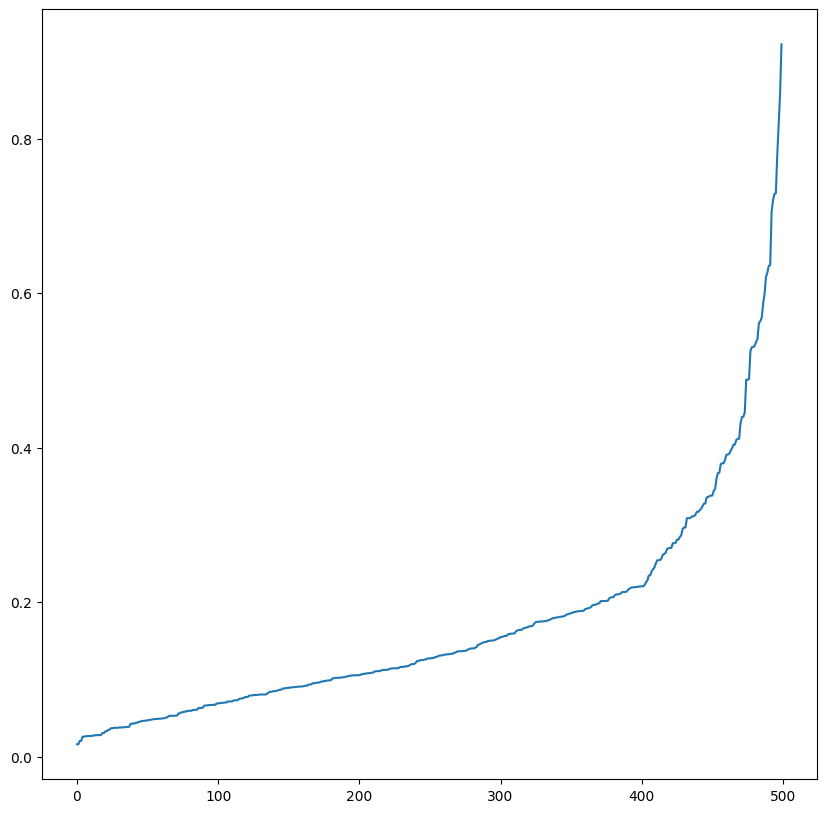

In [8]:
# Ordenar, seleccionar y graficar
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

El resultado son las distancias ascendientemente ordenadas de todos los puntos.<br>
Seleccionar valores para el epsilon a través del método de la rodilla: Entre 0.2 y 0.5

In [9]:
# Iterar sobre el epsilon y el mínimo de vecinos válidos para DBSCAN
eps_values = np.arange(0.25, 0.8, 0.10) 
min_samples = np.arange(2, 10)

In [10]:
'''
Este código recorre una lista de parámetros para el algoritmo DBSCAN (eps_values y min_samples) y calcula el coeficiente de silueta de cada parámetro. El coeficiente de silueta es una medida de cuán bien se ajusta el algoritmo a los datos. Al final, la lista sil_scores contiene los resultados de cada parámetro.
'''
dbscan_paramns = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_paramns:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(x)
    sil_scores.append(silhouette_score(x, y_pred))

In [11]:
# Variables y pivot para graficar 
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps', 'Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores', index='Min_Samples', columns='Eps')

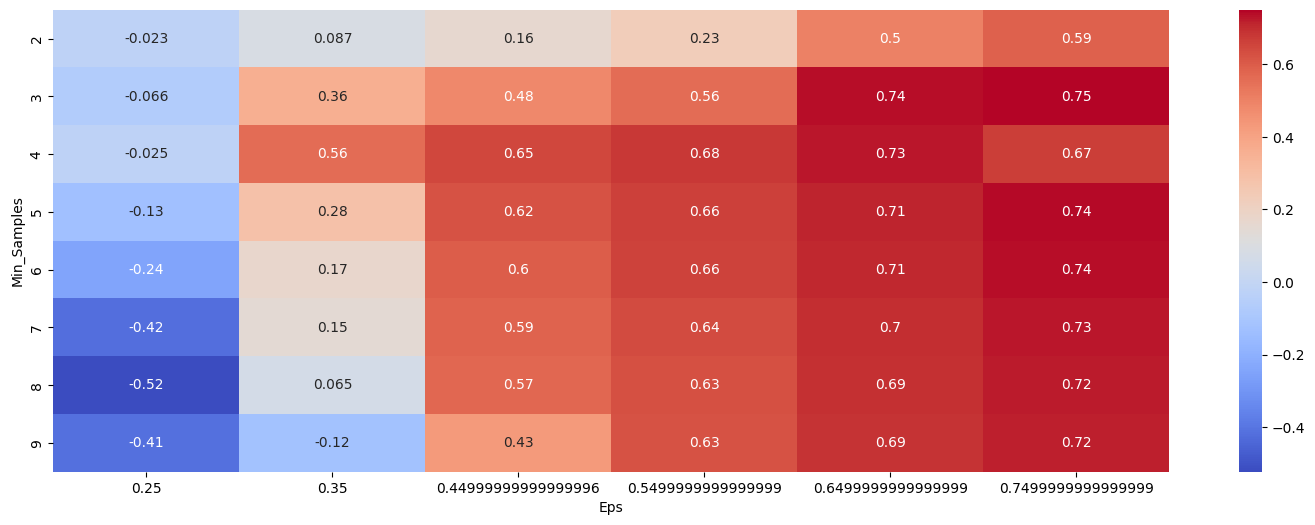

In [12]:
# Graficar
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

Los puntos más cálidos representan mayor desempeño o mejor índice de silueta.

### Evaluar resultados

In [13]:
# Aplicar los parámetros óptimos según la gráfica anterior
dbscan_cluster = DBSCAN(eps=0.6, min_samples=3)
y_predict = dbscan_cluster.fit_predict(x)
df_blobs['cluster'] = y_predict

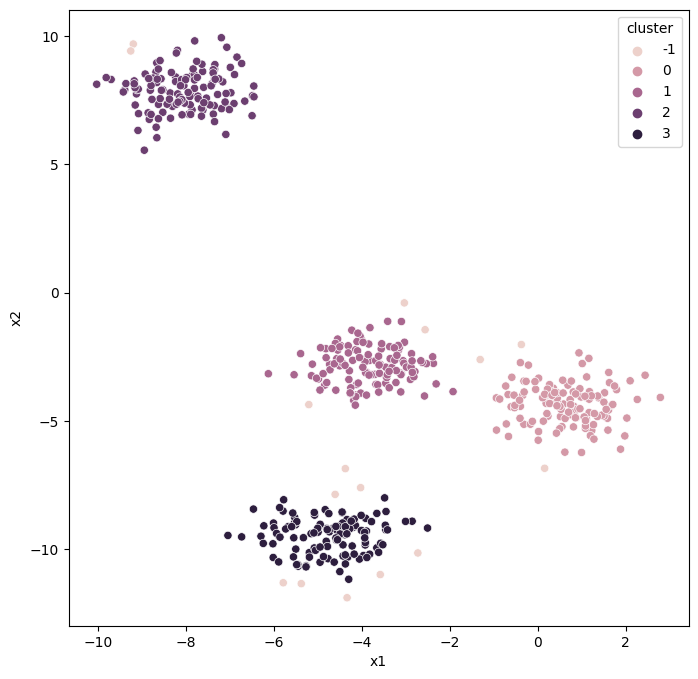

In [14]:
# Graficar resultados
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.7266680856468234


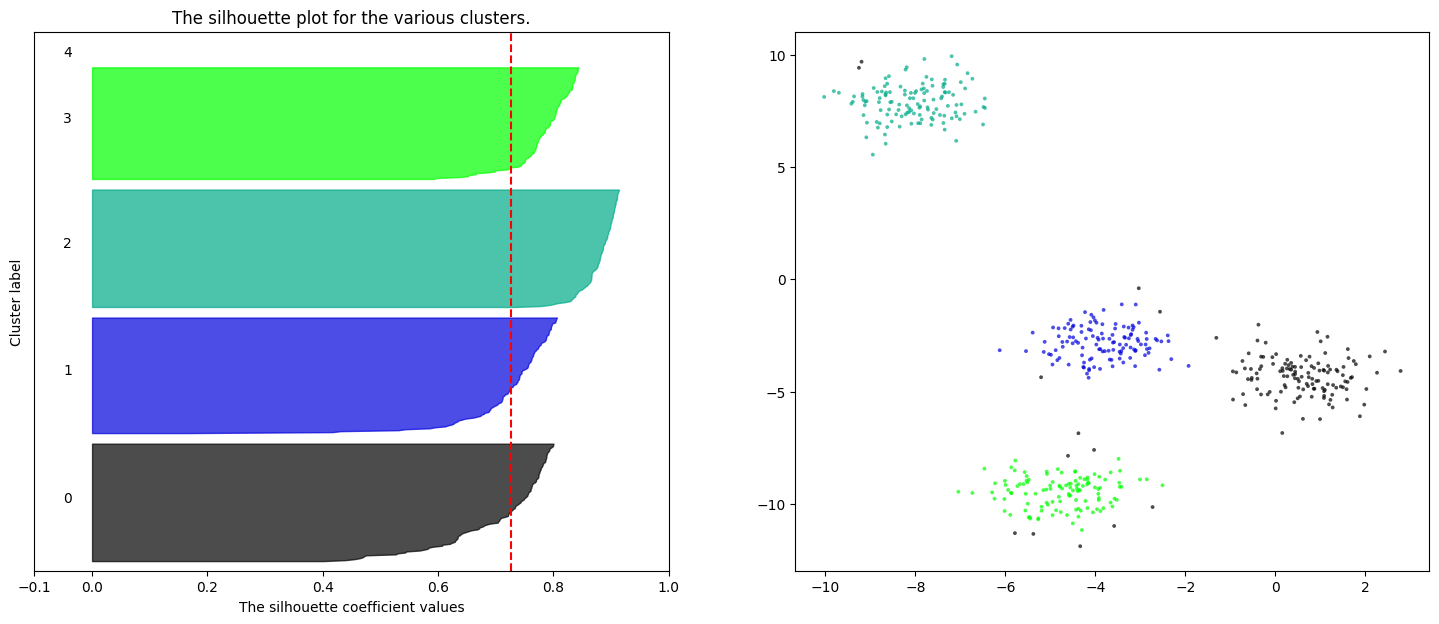

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])

clusterer = DBSCAN(eps=0.6, min_samples=3)
cluster_labels = clusterer.fit_predict(x)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

silhouette_avg = silhouette_score(x, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(x, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

plt.show()